# Marketing Campaign Analytics

In this notebook, I am looking at data obtained from an email marketing campaign serving 3 different email subject lines across a three month period. There are three tables for this data. They are:

**UB**: This is the Userbase which contains the customer’s attributes. The fields of the table are:
* Customer_ID: The unique ID of the customer
* Gender: The gender of the customer. “M” is Male; “F” is Female
* Type: The business type of the customer. “B” is Business; “C” is Consumer
* Email_Address: The email address of the customer. For security reasons the emails have been masked
* Age: The age of the customer
* Tenure: The tenure of the customer in months

**Sent_Table**: This table contains all the Sent Event logs of this email campaign. The fields of the table are:
* Sent_Date: The email sent date
* Customer_ID: The unique ID of the customer
* SubjectLine_ID: The ID of the subject Line. There are three unique Subject Line IDs

**Responded_Table**: This table contains all the email subject lines which were opened by the customers within one week. The fields of the table are:
* Responded_Date: The date where the Customer opened the email
* Customer_ID: The unique ID of the Customer
* SubjectLine_ID: The ID of the subject line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Exploratory Data Analysis

Load in the tables and see what they look like.

In [2]:
df_UB = pd.read_csv('UB.csv')
df_Sent_Table = pd.read_csv('Sent_Table.csv')
df_Responded_Table = pd.read_csv('Responded_Table.csv')

In [3]:
df_UB.head()

,Customer_ID,Gender,Type,Email_Address,Age,Tenure
0,1,M,C,Mph@msn.com,38,12
1,2,F,B,SophcYN7381qMe8lRqK@aol.com,37,23
2,3,F,C,xE@msn.com,32,15
3,4,M,C,WduR0o0@comcast.net,31,24
4,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13


In [4]:
df_Sent_Table.head()

,Sent_Date,Customer_ID,SubjectLine_ID
0,2016-01-28,1413,2
1,2016-03-02,83889,2
2,2016-03-09,457832,3
3,2016-01-20,127772,1
4,2016-02-03,192123,3


In [5]:
df_Responded_Table.head()

,Responded_Date,Customer_ID,SubjectLine_ID
0,2016-01-25,217102,3
1,2016-03-26,366875,2
2,2016-03-17,201561,2
3,2016-01-11,395345,3
4,2016-01-11,427539,3


In [6]:
df_UB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Customer_ID    500000 non-null  int64 
 1   Gender         500000 non-null  object
 2   Type           500000 non-null  object
 3   Email_Address  500000 non-null  object
 4   Age            500000 non-null  int64 
 5   Tenure         500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [7]:
df_Sent_Table.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476354 entries, 0 to 2476353
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Sent_Date       2476354 non-null  object
 1   Customer_ID     2476354 non-null  int64 
 2   SubjectLine_ID  2476354 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 56.7+ MB


In [8]:
df_Responded_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378208 entries, 0 to 378207
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Responded_Date  378208 non-null  object
 1   Customer_ID     378208 non-null  int64 
 2   SubjectLine_ID  378208 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ MB


I can see that there are no missing values. Now I'll compute some summary statistics of the age and tenure attributes and plot histograms of them.

In [9]:
df_UB.describe()['Age']

count    500000.000000
mean         31.618982
std           6.707925
min          18.000000
25%          27.000000
50%          31.000000
75%          36.000000
max          63.000000
Name: Age, dtype: float64

In [10]:
df_UB.describe()['Tenure']

count    500000.000000
mean         16.192818
std           6.467513
min           0.000000
25%          11.000000
50%          14.000000
75%          22.000000
max          38.000000
Name: Tenure, dtype: float64

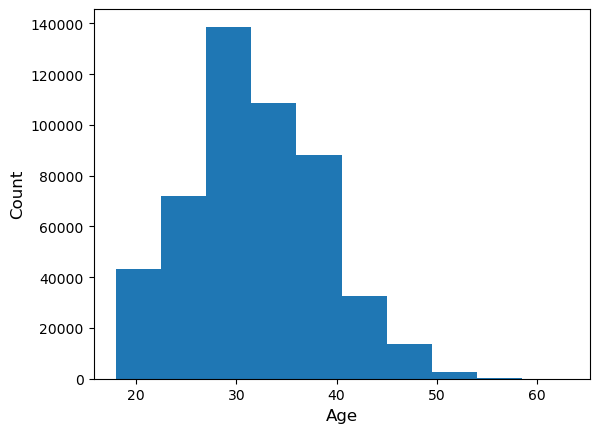

In [11]:
plt.hist(df_UB['Age'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

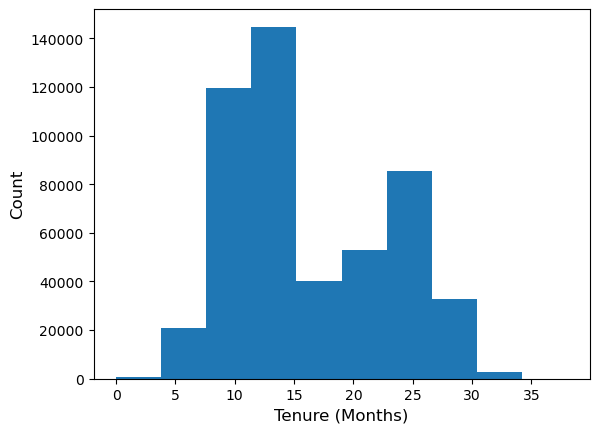

In [12]:
plt.hist(df_UB['Tenure'])
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Looks like the distribution of the age of the customers is approximately normal, and the distribution of tenure is bimodal with one peak around 13 and the other around 25.

I will now calculate the average age, tenure and the proportion of customers per gender and business type and output that information in a table.

In [13]:
table = df_UB.groupby(['Gender', 'Type']).mean(numeric_only=True).drop(['Customer_ID'], axis=1)
table.columns = ['Average Age', 'Average Tenure']
table['Proportion of Customers'] = df_UB.groupby(['Gender', 'Type']).count()['Customer_ID'] / len(df_UB)
table

Average Age  Average Tenure  Proportion of Customers
Gender Type                                                      
F      B       37.969927       16.203791                 0.069630
       C       30.032257       16.176706                 0.280308
M      B       37.984278       16.174355                 0.129758
       C       30.036459       16.204634                 0.520304

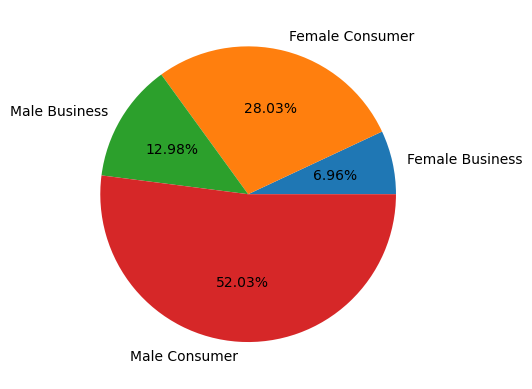

In [14]:
labels = ['Female Business', 'Female Consumer', 'Male Business', 'Male Consumer']
sizes = table['Proportion of Customers']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

The code below calculates the number of customers per email domain.

In [15]:
df_UB['Email Domain'] = df_UB['Email_Address'].str.extract('@(.*)') #extract email domains and add them in a separate column to the df
email = df_UB.groupby(['Email Domain']).count()[['Customer_ID']] #get the count of each email domain
email.columns = ['Number of Customers']
email['Proportion'] = email['Number of Customers'] / len(df_UB)
email

,Number of Customers,Proportion
Email Domain,,
aol.com,49975,0.099950
comcast.net,34820,0.069640
gmail.com,150266,0.300532
hotmail.com,125482,0.250964
msn.com,74626,0.149252
yahoo.com,64831,0.129662


I am also interested in the average number of emails sent per weekday.

In [16]:
date_count = df_Sent_Table.groupby(['Sent_Date'], as_index = False).count() #get how many emails were sent by each specific date
date_count['Sent_Date'] = pd.to_datetime(date_count['Sent_Date']) #convert the sent date column to the datetime data type
date_count['Weekday'] = date_count['Sent_Date'].dt.day_name() #create column classifying each date with the day of the week

avg_email = date_count.groupby(['Weekday']).mean(numeric_only=True)[['Customer_ID']] #get average number of emails sent by day of the week
avg_email.columns = ['Average Number of Emails Sent']
avg_email = avg_email.drop(['Saturday', 'Sunday'])
avg_email = avg_email.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
avg_email

,Average Number of Emails Sent
Weekday,
Monday,28460.333333
Tuesday,28468.333333
Wednesday,28386.666667
Thursday,28570.166667
Friday,28424.000000


## Analyzing the Open Rate

In this part of the notebook, I want to look at the rate different kinds of customers open the emails and the rate emails with different subject lines are opened.

A response is valid when a customer opens the corresponding subject line ID at the sent date (i.e. **Sent_Date** equals **Responded_Date**, **Customer_ID** of Sent Table equals **Customer_ID** of Responded Table, and **SubjectLine_ID** of Sent Table equals **SubjectLine_ID** of Responded Table).

The open rate is defined as the number of valid email responses over emails sent.

Open rate by SubjectLine_ID.

In [17]:
responses = df_Sent_Table.merge(df_Responded_Table, how='left', left_on=['Sent_Date', 'Customer_ID', 'SubjectLine_ID'], right_on=['Responded_Date', 'Customer_ID', 'SubjectLine_ID'])
responses = responses.drop_duplicates() #responded table has duplicate responses that can be dropped
responses['Valid'] = responses['Responded_Date'].notnull() #create true or false column saying if an email had a valid response

subject_rate = responses.groupby(['SubjectLine_ID']).mean(numeric_only=True)[['Valid']]
subject_rate.columns = ['Open Rate']
subject_rate

,Open Rate
SubjectLine_ID,
1,0.096236
2,0.095621
3,0.085326


In [18]:
s1 = responses[responses['SubjectLine_ID'] == 1]['Valid']
s2 = responses[responses['SubjectLine_ID'] == 2]['Valid']
s3 = responses[responses['SubjectLine_ID'] == 3]['Valid']
stats.kruskal(s1, s2, s3)

KruskalResult(statistic=739.2933740089005, pvalue=2.9139599613849197e-161)

I performed a Kruskall-Wallis test to determine if the open rate differs between any of
the three Subject Line IDs. The resulting test statistic was about 739 which has a
p-value of well below 0.05. As such, we reject the null hypothesis that all three types of
emails have the same open rate. The data suggests that at least one Subject Line ID
has a different open rate from the others.

Open rate by type of customer.

In [19]:
UB_responses = responses.merge(df_UB, how='left', on='Customer_ID')

type_rate = UB_responses.groupby(['Type']).mean(numeric_only=True)[['Valid']]
type_rate.columns = ['Open Rate']
type_rate

,Open Rate
Type,
B,0.101392
C,0.090152


Line chart showing the open rate across ages for the different types and genders of customer.

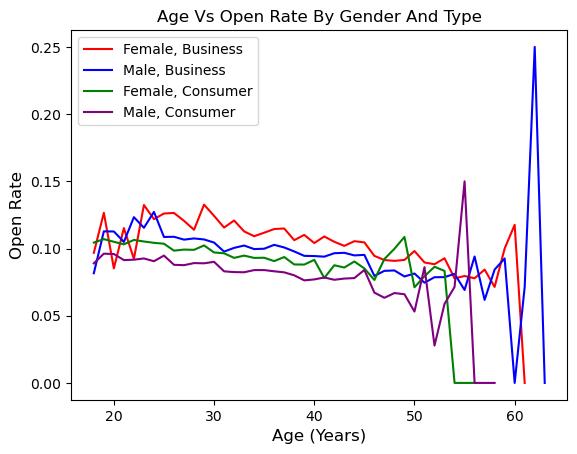

In [20]:
age_type_gender = UB_responses.groupby(['Age', 'Type', 'Gender']).mean(numeric_only=True)[['Valid']]
age_type_gender.reset_index(inplace=True)

BF = age_type_gender[(age_type_gender['Type'] == 'B') & (age_type_gender['Gender'] == 'F')]
BM = age_type_gender[(age_type_gender['Type'] == 'B') & (age_type_gender['Gender'] == 'M')]
CF = age_type_gender[(age_type_gender['Type'] == 'C') & (age_type_gender['Gender'] == 'F')]
CM = age_type_gender[(age_type_gender['Type'] == 'C') & (age_type_gender['Gender'] == 'M')]

plt.plot(BF['Age'], BF['Valid'], color='red', label = 'Female, Business')
plt.plot(BM['Age'], BM['Valid'], color='blue', label = 'Male, Business')
plt.plot(CF['Age'], CF['Valid'], color='green', label = 'Female, Consumer')
plt.plot(CM['Age'], CM['Valid'], color='purple', label = 'Male, Consumer')
plt.legend()
plt.title('Age Vs Open Rate By Gender And Type', fontsize=12)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Open Rate', fontsize=12)
plt.show()